In [98]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline

In [99]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]),int(color[1]),int(color[2]))

In [100]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    return image

In [146]:
def get_colors(image, number_of_colors, show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters=5)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        fig, ax = plt.subplots(2, 1, figsize=(8, 6))
        ax[0].plot(counts.values(), kind='pie', labels=hex_colors, colors=hex_colors, autopct='%1.1f%%')
        dominant_color = counts.most_common(1)[0][0]
        dom_hex = RGB2HEX(ordered_colors[dominant_color])
        ax[1].plot(x='DOM', kind='bar', color=dom_hex, height=0.2)
    return rgb_colors

AttributeError: 'Line2D' object has no property 'kind'

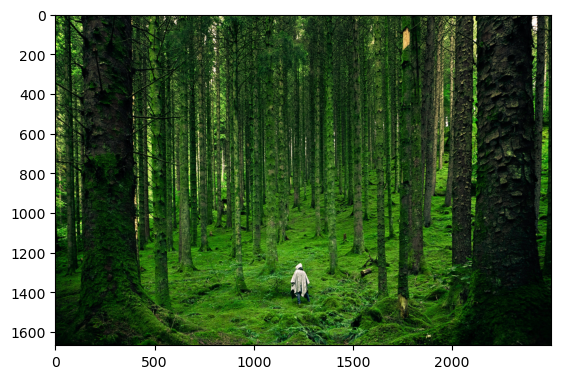

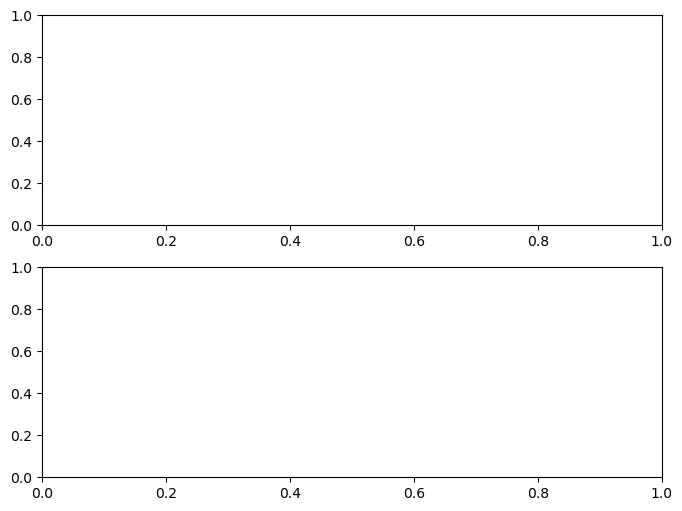

In [147]:
get_colors(get_image('4.jpg'), 8, True)

3
80370
dict_values([47798, 80370, 55274, 33598, 22960])
[146.93999404  50.58192376  77.87680167]



[array([10.17125881,  5.18312099,  7.60760685]),
 array([146.93999404,  50.58192376,  77.87680167]),
 array([82.45929528, 33.17460633, 64.87673784]),
 array([35.97276772, 20.13302923, 46.20179974]),
 array([211.06056363,  82.67412043,  89.64895852])]

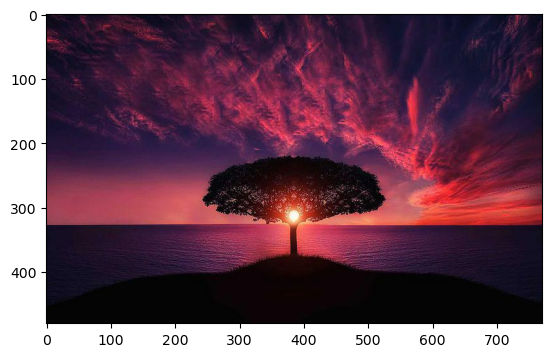

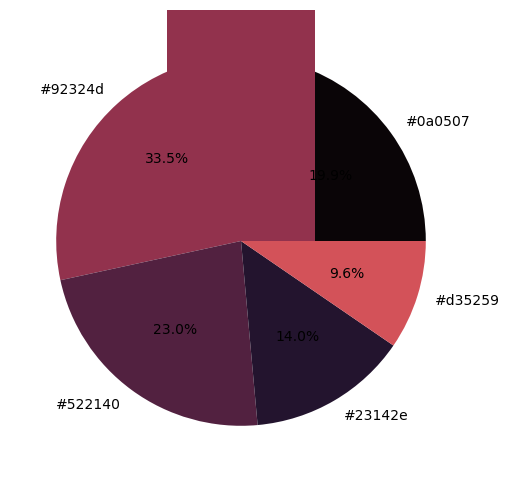

In [133]:
get_colors(get_image('1.jpg'), 8, True)

4


[array([116.73534782, 119.23296695,  44.34542265]),
 array([69.81126074, 73.0412859 , 28.63439753]),
 array([214.22973228, 196.02535822, 130.26470588]),
 array([175.01524989, 179.07168202,  39.4637249 ]),
 array([27.17108163, 27.57917786, 10.90710802])]

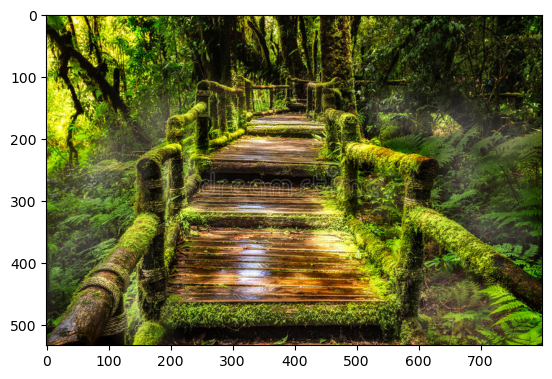

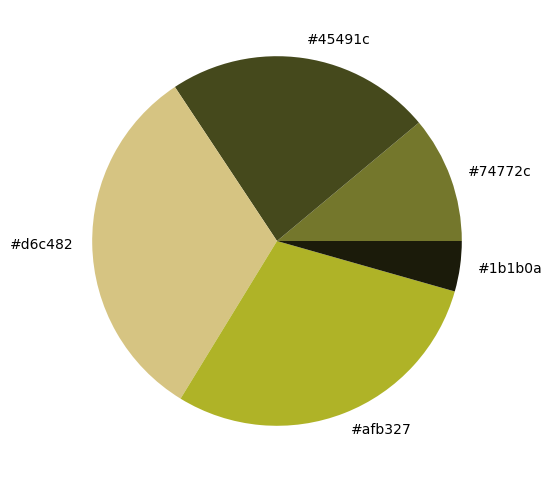

In [104]:
get_colors(get_image('2.jpg'), 8, True)

1


[array([139.80043795, 133.04598426, 120.83970457]),
 array([ 32.37375135, 162.73945946, 174.5395027 ]),
 array([198.25372514, 224.02450918, 232.90405837]),
 array([129.12915675, 191.22840419, 210.05417444]),
 array([43.56409583, 58.77563004, 51.01957831])]

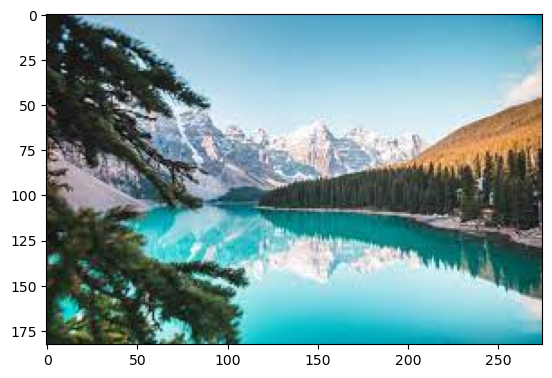

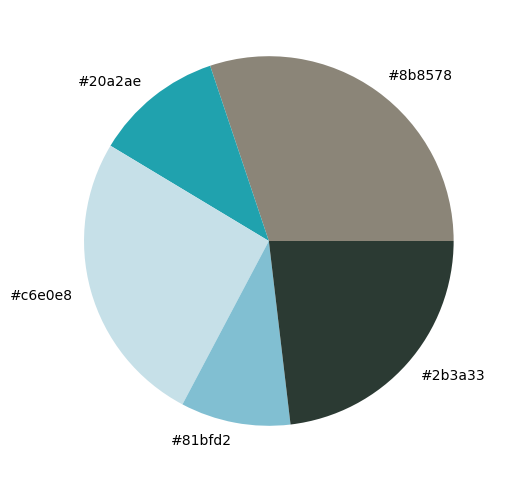

In [105]:
get_colors(get_image('3.jpg'), 8, True)